# <center>detritalPy: A Python-based Toolset for Visualizing and Analyzing Detrital Geo-Thermochronologic Data</center>

## <center>Glenn R. Sharman, Jonathan P. Sharman, and Zoltan Sylvester</center>

### <center>Version 1.3.18</center>

### I. Import required modules
This step must by run initially, but then does not need to be run again for the remainder of the analysis session.
<i>Hint: select a cell with code and Shift+Enter to execute it</i>

In [8]:
import os
import detritalpy
import detritalpy.detritalFuncs as dFunc
import pathlib
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # For improving matplotlib figure resolution
matplotlib.rcParams['pdf.fonttype'] = 42 # For allowing preservation of fonts upon importing into Adobe Illustrator
matplotlib.rcParams['ps.fonttype'] = 42
print('detritalPy version: ',detritalpy.__version__)

detritalPy version:  1.3.23


### II. Import the dataset as an Excel file
This step must by run initially, and should be repeated if any changes are made to the dataset in Excel. The simplest way to load data is to place the Excel file(s) in the same directory or a sub-directory of the Jupyter Notebook file. For more options, please refer to dataLoading.ipynb.

In [9]:
wd = os.getcwd()
file_path = os.path.join(wd, '2021-Wyn-DetritalPy-SpreadSheet-xls.xls')
file_path

'E:\\Users\\libby\\Documents\\Ph.D\\Manuscripts\\2020_Wynny\\2021-Wyn-Geochron-Manuscript-v2\\2021-Wyn-DetritalPy\\DetritalPy-WTT-Comparisons\\2021-Wyn-DetritalPy-SpreadSheet-xls.xls'

In [20]:
# Specify file paths to data input file(s)
dataToLoad = [file_path]

main_df, main_byid_df, samples_df, analyses_df = dFunc.loadDataExcel(dataToLoad)

Optional: run the cell below to plot a distribution of sample size (number of analyses per sample) in the dataset

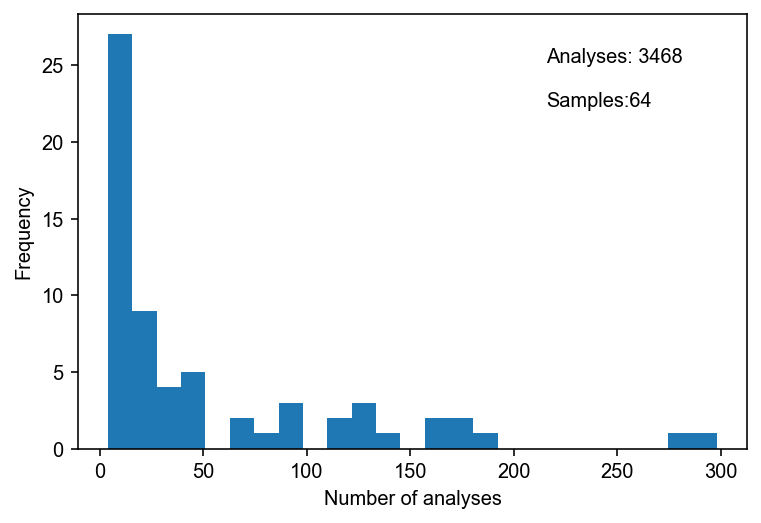

In [21]:
dFunc.plotSampleDist(main_byid_df, numBins=25)

### III. Select samples
Individual or groups of samples can be selected by entering their unique Sample ID's in an array or tuple (see example below for the correct syntax). This sample list will be used for all subsequent plotting and analysis functions.

In [22]:
sampleList = [(['WYN17-1', 'WYN17-2'],
               'Wynyard Formation'),

              (['WT12WH73', 'WT131414', 'WT12WH20', 'WT12WH11',
                'R017895'],
               'Devonian-Carboniferous Granitoids'),

              (['96220032', 'B-134362', 'B-134308', 'B-134329', 'B-130598',
                'B-130600', '07M-02', '07M-05', '07M-07', '07M-06',
                '315R-150', '08M-03', '120R-1414', '120R-1320', '112R-668',
                'WSP-5-12', 'HED011-893', 'HED02-73', 'HED11-256', '07M-24',
                '08M-09', '07M-21', '07M-22', '07M-25', '07M-09'],
               'Mount Read Volcanics'),

              (['R018036', 'R018029', 'BF1406', '93220002'],
               'Oonah Formation'),

              (['R018210', 'R018213', 'R018218', 'R018223', 'R018272'],
               'Luina Group'),

              (['SY016', 'G407255', 'G407256'],
               'Crimson Creek Formation'),

              (['93220006', 'R005453', 'R005458', 'G408136', 'R005005', 'R005006',
                'R005432'],
               'Arthur Lineament'),

              (['SM17-46'],
               'Success Creek Group'),

              (['73-116'],
               'Wings Sandstone'),

              (['IS-2012-569', 'DS-135962', 'BS-CCQTZ', 'LRQ-2012-306', 'PRS-136057'],
               'Rocky Cape Group'),

              (['R6533/MCPP1', 'G407249'],
               'Tyennan Element'),

              (['R004296', 'B-134314'],
               'Forest Conglomerant (Togari Group)'),

              (['B-130628', 'B-130590'],
               'Stitt Quartzite')
              ]

ages, errors, numGrains, labels = dFunc.sampleToData(
    sampleList, main_byid_df, sigma='1sigma')

## Plot detrital age distributions
Plot detrital age distributions as cumulative distribution functions (CDFs), probability density plots (PDPs), kernal density estimations (KDEs), histograms, and pie diagrams. Plotting options must be selected below.

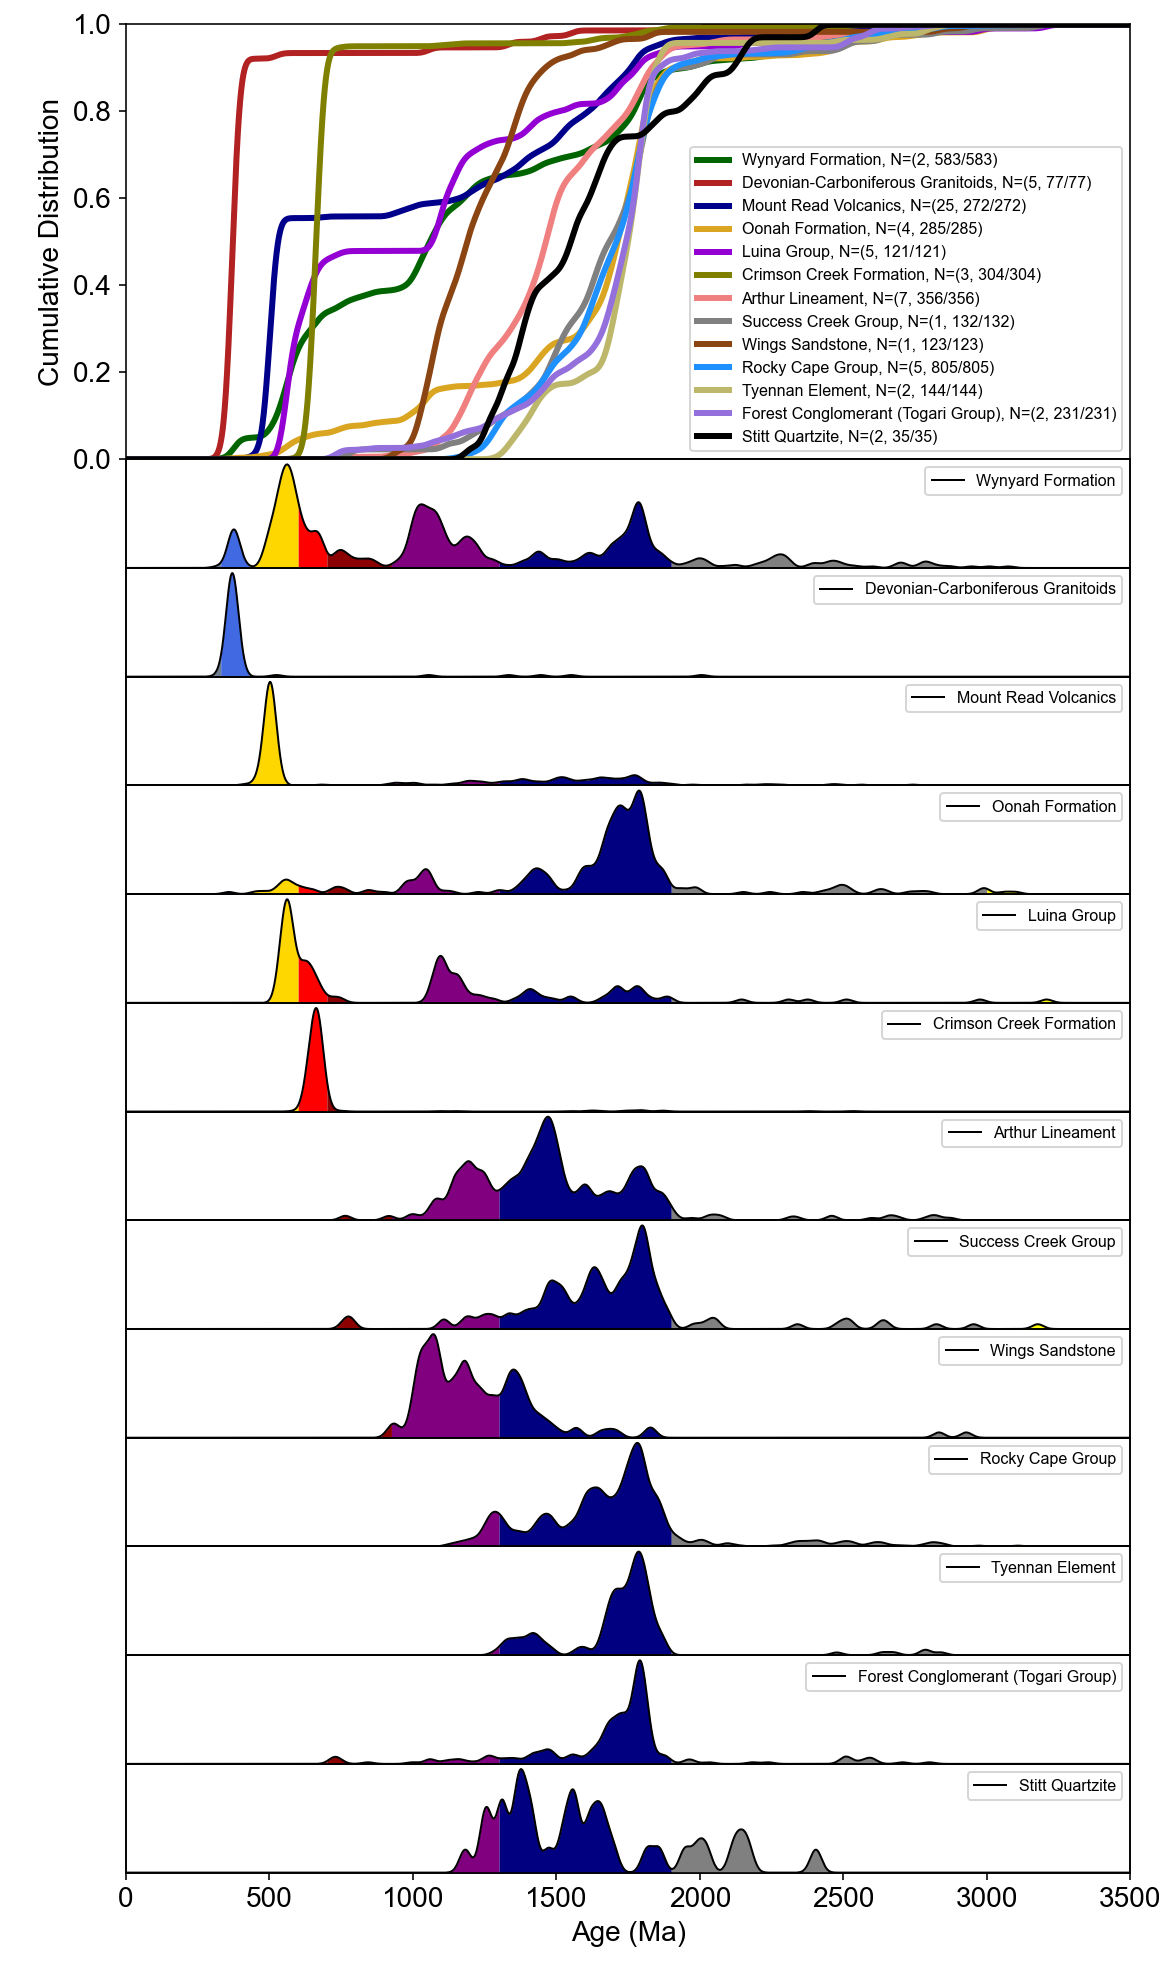

In [24]:
# Enter plot options below
whatToPlot = 'both' # Options: cumulative, relative, or both
separateSubplots = True # Set to True to plot each relative age distribution in a separate subplot (allows histogram and pie)

# Specify the age range (Myr) that you want to plot
x1 = 0
x2 = 3500
plotLog = False # Set to True to plot the x-axis as a log scale

# Specify the plot dimensions
w = 10 # width of the plot
c = 4 # height of CDF panel
h = 5 # height of the relative panel (only required if separateSubplots is False). Options: 'auto' or an integer

# Specify the interval (Myr) over which distributions are calculated
xdif = 1 # Note: an interval of 1 Myr is recommended

# Cumulative distribution options
plotCDF = False # Plot the CDF discretized at xdif interval
plotCPDP = False # Plot the cumulative PDP
plotCKDE = True # Plot the cumulative KDE
plotDKW = False # Plot the 95% confidence interval of the CDF (Dvoretsky-Kiefer-Wolfowitz inequality)

# Relative distribution options
normPlots = False # Will normalize the PDP/KDE if equals True (if separateSubplots is True)

plotKDE = True # Set to True if want to plot KDE
colorKDE = False # Will color KDE according to same coloration as used in CDF plotting
colorKDEbyAge = True # Will color KDE according to age populations if set to True
bw = 20 # Specify the KDE bandwidth. Options are 'optimizedFixed', 'optimizedVariable', or a number (bandwidth in Myr)

plotPDP = False # Set to True if want to plot PDP
colorPDP = False # Will color PDP according to same coloration as used in CDF plotting
colorPDPbyAge = False # Will color PDP according to age populations if set to True

plotColorBar = False # Color age categories as vertical bars, can add white bars to create blank space between other colored bars

plotHist = False # Set to True to plot a histogram (only available when separateSubplots is True)
b = 5 # Specify the histogram bin size (Myr)

plotPIE = False # Will plot a pie diagram (only available when separateSubplots is True)

# Specify  age categories for colored KDE, PDP, and/or pie plots
# Sharman et al. 2015 scheme
# E Aus Lachlan Origin Granitoids = 330 - 430; Hong et al 2017
# Recycled Mesoproterozoic Grains = 
agebins = [0, 330, 430, 600, 700, 925, 1300, 1900, 3000, 4000]
agebinsc = ['slategray','royalblue','gold','red','darkred','purple','navy','gray','yellow']

plotAgePeaks = False # Will identify and plot age peaks
agePeakOptions = ['KDE', 0.05, 50, 10, True] # [distType, threshold, minDist, minPeakSize, labels]

fig = dFunc.plotAll(sampleList, ages, errors, numGrains, labels, whatToPlot, separateSubplots, plotCDF, plotCPDP, plotCKDE, 
                    plotDKW, normPlots, plotKDE, colorKDE, colorKDEbyAge, plotPDP, colorPDP, colorPDPbyAge, plotColorBar, 
                    plotHist, plotLog, plotPIE, x1, x2, b, bw, xdif, agebins, agebinsc, w, c, h, plotAgePeaks, agePeakOptions,
                    CDFlw=3, KDElw=1, PDPlw=1)

Optional: Run the cell below to save the figure as a pdf file

In [ ]:
pathlib.Path('Output').mkdir(parents=True, exist_ok=True) # Recursively creates the directory and does not raise an exception if the directory already exists 
fig.savefig('Output/DZageDistributions.pdf')

## Plot sample locations on an interactive map
Samples with coordinate information (latitude and longitude in WGS84 coordinates) can be plotted on an interactive map. This functionality requires the following modules must be installed: folium and vincent. These can be installed via the python command line prompt by entering "pip install folium" and "pip install vincent".

In [8]:
# Specify whether age distributions should be enabled (can be viewed by clicking on samples)
plotMapKDE = False # Choose True to enable KDEs when samples are selected
plotMapPDP = False # Choose True to enable PDPs when samples are selected
plotCumulative = False # Choose True to plot either a cumulative KDE or PDP. A discretized CDF will be plotted if KDE and PDP are both set to False

# Specify the upper age limit that you want to plot
x2 = 3500
# Specify the KDE bandwidth
bw = 1.5 # Specify the KDE bandwidth. Options are 'optimizedFixed', 'optimizedVariable', or a number (bandwidth in Myr)

mapType = 'World_Topo_Map' # Options: 'NatGeo_World_Map', 'World_Street_Map', 'World_Topo_Map', 'World_Light_Gray',
                             # 'World_Shaded_Relief', 'World_Terrain_Base', 'World_Hillshade', 'World_Physical_Map'

exportKML = True
descrpt = 'Unit' # Description to be included with each sample
    
dFunc.plotFoliumMap(sampleList, main_byid_df, ages, errors, numGrains, plotMapKDE, 
                             plotMapPDP, plotCumulative, x2, bw, mapType, exportKML, descrpt)

1.839427999999998
1.9483625499999846
latitude 1.839427999999998 -> (2.5, 7)
longitude 1.9483625499999846 -> (2.5, 7)


## Multi-dimensional scaling
Create a multi-dimensional scaling (MDS) plot for individual samples or groups of samples. <i><b>Revised and updated in detritalpy version 1.3.</b></i>

In [9]:
sampleList = [(['WYN17-1', 'WYN17-2'],
               'Wynyard Formation'),

              (['WT12WH73', 'WT131414', 'WT12WH20', 'WT12WH11',
                'R017895'],
               'Devonian-Carboniferous Granitoids'),

              (['96220032', 'B-134362', 'B-134308', 'B-134329', 'B-130598',
                'B-130600', '07M-02', '07M-05', '07M-07', '07M-06',
                '315R-150', '08M-03', '120R-1414', '120R-1320', '112R-668',
                'WSP-5-12', 'HED011-893', 'HED02-73', 'HED11-256', '07M-24',
                '08M-09', '07M-21', '07M-22', '07M-25', '07M-09'],
               'Mount Read Volcanics'),

              (['R018036', 'R018029', 'BF1406', '93220002'],
               'Oonah Formation'),

              (['R018210', 'R018213', 'R018218', 'R018223', 'R018272'],
               'Luina Group'),

              (['SY016', 'G407255', 'G407256'],
               'Crimson Creek Formation'),

              (['93220006', 'R005453', 'R005458', 'G408136', 'R005005', 'R005006',
                'R005432'],
               'Arthur Lineament'),

              (['SM17-46'],
               'Success Creek Group'),

              (['73-116'],
               'Wings Sandstone'),

              (['IS-2012-569', 'DS-135962', 'BS-CCQTZ', 'LRQ-2012-306', 'PRS-136057'],
               'Rocky Cape Group'),

              (['R6533/MCPP1', 'G407249'],
               'Tyennan Element'),

              (['R004296', 'B-134314'],
               'Forest Conglomerant (Togari Group)'),

              (['B-130628', 'B-130590'],
               'Stitt Quartzite')
              ]

ages, errors, numGrains, labels = dFunc.sampleToData(
    sampleList, main_byid_df, sigma='1sigma')

Run the model. Note that this may take a while, depending on the number of initializations (n_init) chosen. Increasing the number of initializations increased the likelihood of finding a more optimal fit (i.e., lower stress).

In [10]:
model = dFunc.MDS_class(ages, errors, labels, sampleList, metric=False, criteria='Vmax', bw='optimizedFixed', n_init='metric', 
                        max_iter=100000, x1=0, x2=4500, xdif=1, min_dim=1, max_dim=3, dim=2)

After the model has been run, a number of figures can be generated, in any order.

A stress plot gives an indication of the goodness-of-fit and how this varies depending on how many dimensions are modeled

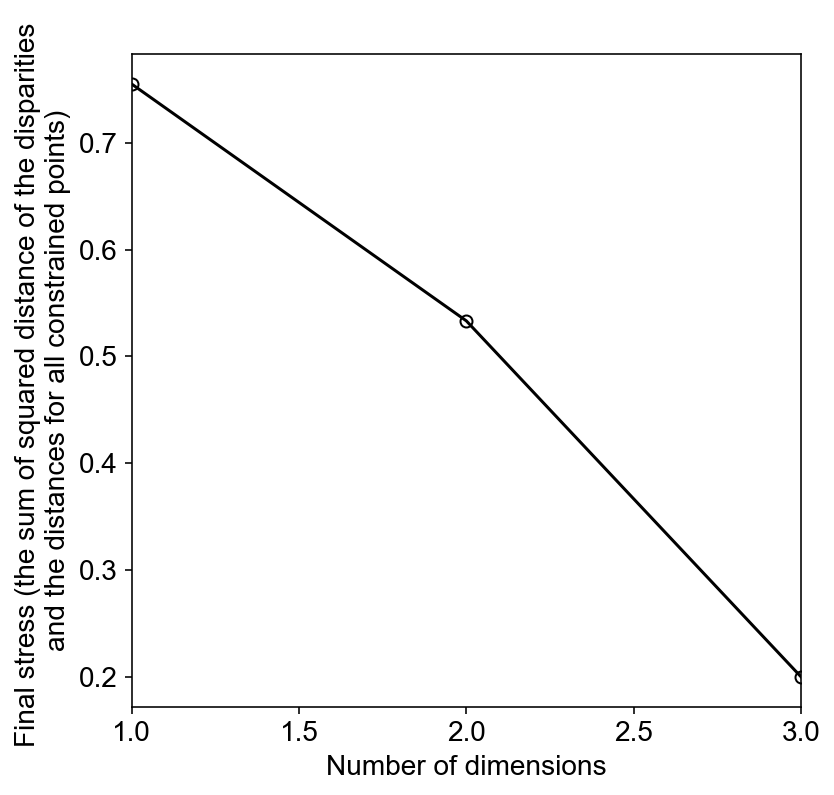

In [11]:
model.stressPlot(figsize=(6,6), savePlot=False, fileName='stressPlot.pdf', stressType='sklearn')

A Shepard plot compares x-y distance on the MDS plot against the dissimilarity metric. Ideally, sample pairs that are far apart on the MDS plot (large distance) will also be the most dissimilar, and visa versa. The amount of scatter gives a sense of the stress value - a lot of scatter means that there's a lot of variance in how well distance on the MDS plot characterizes sample dissimilarity.

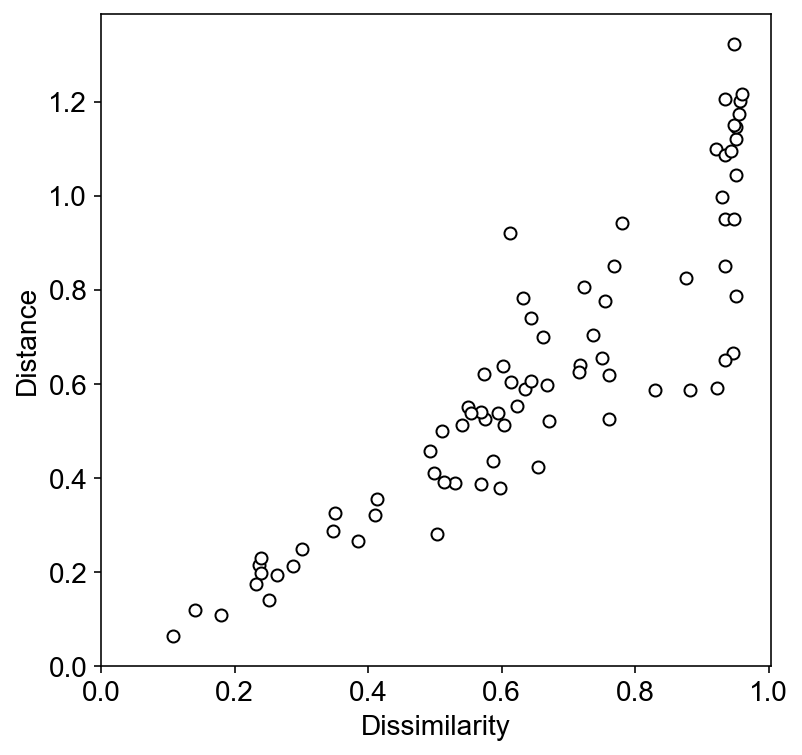

In [12]:
model.shepardPlot(figsize=(6,6), savePlot=False, fileName='shepardPlot.pdf', plotOneToOneLine=False)

The MDS plot is a depiction of sample similarity and dissimilarity (refer to Vermeesch, 2013: Chemical Geology for a more complete description).

Final stress:  0.5332469565655505


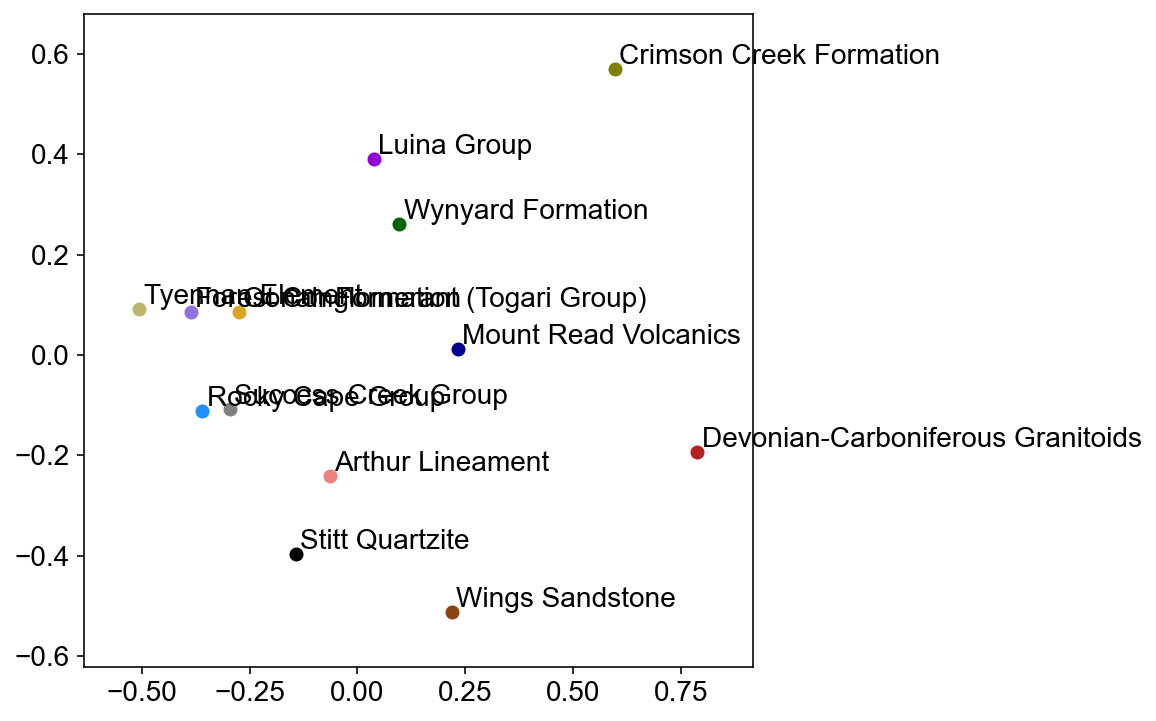

In [13]:
model.MDSplot(figsize=(6,6), savePlot=False, fileName='MDSplot.pdf', plotLabels=True, equalAspect=False, 
              stressType='sklearn')

## Export sample comparison matrices as a CSV file
Creates matricies of sample comparisons using a number of different metrics (see Saylor and Sundell, 2016). Similiarity, likness, Kolgomorov-Smirnov statistic (Dmax and p-value), Kuiper statistic (Vmax and p-value), and cross-correlation of relative probability density functions. Similiarty, likeness, and cross-correlation values are computed based on either the probability density plot (PDP) or kernal density estimation (KDE).

In [ ]:
sampleList = [(['WYN17-1', 'WYN17-2'],
               'Wynyard Formation'),

              (['WT12WH73', 'WT131414', 'WT12WH20', 'WT12WH11',
                'R017895'],
               'Devonian-Carboniferous Granitoids'),

              (['96220032', 'B-134362', 'B-134308', 'B-134329', 'B-130598',
                'B-130600', '07M-02', '07M-05', '07M-07', '07M-06',
                '315R-150', '08M-03', '120R-1414', '120R-1320', '112R-668',
                'WSP-5-12', 'HED011-893', 'HED02-73', 'HED11-256', '07M-24',
                '08M-09', '07M-21', '07M-22', '07M-25', '07M-09'],
               'Mount Read Volcanics'),

              (['R018036', 'R018029', 'BF1406', '93220002'],
               'Oonah Formation'),

              (['R018210', 'R018213', 'R018218', 'R018223', 'R018272'],
               'Luina Group'),

              (['SY016', 'G407255', 'G407256'],
               'Crimson Creek Formation'),

              (['93220006', 'R005453', 'R005458', 'G408136', 'R005005', 'R005006',
                'R005432'],
               'Arthur Lineament'),

              (['SM17-46'],
               'Success Creek Group'),

              (['73-116'],
               'Wings Sandstone'),

              (['IS-2012-569', 'DS-135962', 'BS-CCQTZ', 'LRQ-2012-306', 'PRS-136057'],
               'Rocky Cape Group'),

              (['R6533/MCPP1', 'G407249'],
               'Tyennan Element'),

              (['R004296', 'B-134314'],
               'Forest Conglomerant (Togari Group)'),

              (['B-130628', 'B-130590'],
               'Stitt Quartzite')
              ]

ages, errors, numGrains, labels = dFunc.sampleToData(sampleList, main_byid_df, sigma = '1sigma');

In [14]:
calculateSimilarity = True
calculateLikeness = True
calculateKS = True
calculateKuiper = True
calculateR2 = True
fileName = 'interSampleComparison.csv'

# Specify what type of relative distribution to compare for similarity, likeness, and cross-correlation calculations
distType = 'KDE' # Options are 'PDP' or 'KDE'
bw = 10 # Specify the bandwidth for the KDE distribution. Options are 'optimizedFixed','optimizedVariable', or a number (Ma)

dFunc.calcComparisonCSV(ages, errors, numGrains, labels, sampleList, calculateSimilarity, calculateLikeness,
                        calculateKS, calculateKuiper, calculateR2, fileName, distType, bw)

## Export detrital age distributions as a CSV file
Creates a CSV file with raw age distribution data. Distribution types supported are cumulative density functions (CDFs), probability density plots (PDPs), and kernal density estimations (KDEs).

In [ ]:
# Specify export options
exportType = 'CDF' # Options: 'CDF', 'PDP' or 'KDE'
cumulative = False # Only applies if exportType = 'PDP' or 'KDE'

# Specify the age range that you want to export
x1 = 0
x2 = 3500
# Specify the KDE bandwidth
bw = 15 # Options are 'optimizedFixed', 'optimizedVariable', or a number (bandwidth in Ma)
# Specify the interval over which distributions are calculated
xdif = 1
# Require distributions to sum to 1
normalize = True

# Specify file name to save
fileName = 'Dist_to_CSV.csv'

dFunc.exportDist(ages, errors, labels, exportType, cumulative, x1, x2, xdif, bw, fileName, normalize)

## Export ages and errors in tabular format as a CSV file
Creates a CSV file with sample or sample group ages and 1 sigma errors reported in the two-column format that is used by other plotting and analysis software (e.g., DZstats (Saylor and Sundel, 2016) and Arizona LaserChron Center in-house excel macros).

In [ ]:
# Specify file name to save
fileName = 'AgeError_toCSV.csv'

dFunc.agesErrorsCSV(ages, errors, sampleList, fileName)